source: https://www.youtube.com/watch?v=DocaZWh0Fvo

## Multidimensional Scaling

In [1]:
import pandas as pd
import numpy as np
import os
import fnmatch
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE
from sklearn.decomposition import PCA, KernelPCA
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Default parameters

FIGURESIZE = (10, 8)
FONTSIZE = 24

In [4]:
plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [5]:
t = np.arange(-1, 1, 0.001)
x0 = t
x1 = [0.02*random.uniform(-1,1) if (v<0.5 and v>0.5)
     else 2*(1+v)*random.uniform(-1,1) if v <= 0.5
     else 2*(-0.5+v)*random.uniform(-1,1) for v in t]
x2 = np.cos(t*5+1.5)
x0 = np.array([x0])
x1 = np.array([x1])
x2 = np.array([x2])
x = np.concatenate([x0, x1, x2], axis = 0).T
x.shape

(2000, 3)

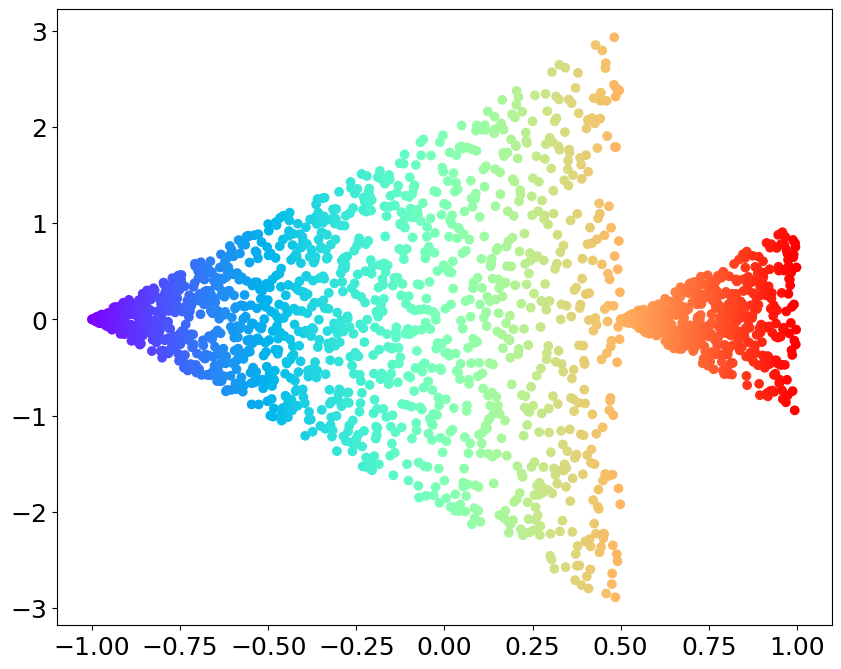

In [6]:
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(x[:,0], x[:,1], c=t, cmap = plt.cm.rainbow)

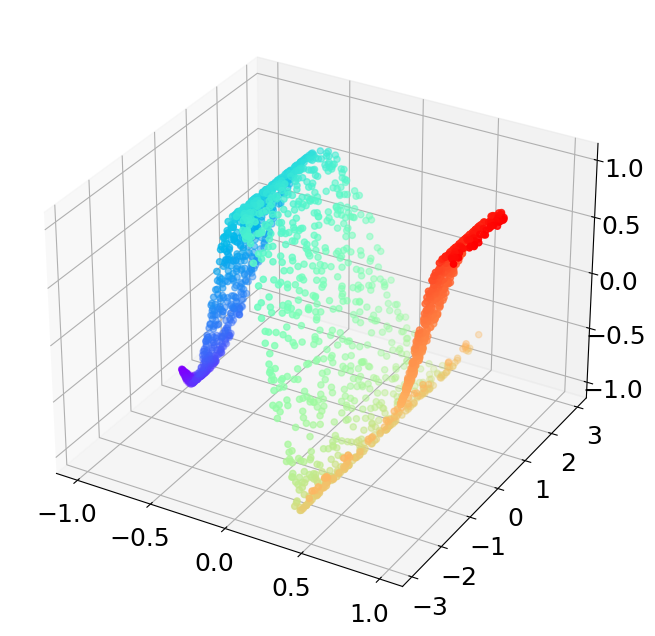

In [9]:
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=t, cmap = plt.cm.rainbow)

## Locally Linear Embedding

In [11]:
model = LocallyLinearEmbedding(n_neighbors=40, n_components=2,
                              eigen_solver='dense', n_jobs=-1)
model.fit(x)

LocallyLinearEmbedding(eigen_solver='dense', n_jobs=-1, n_neighbors=40)

In [12]:
y = model.transform(x)

In [13]:
y.shape

(2000, 2)

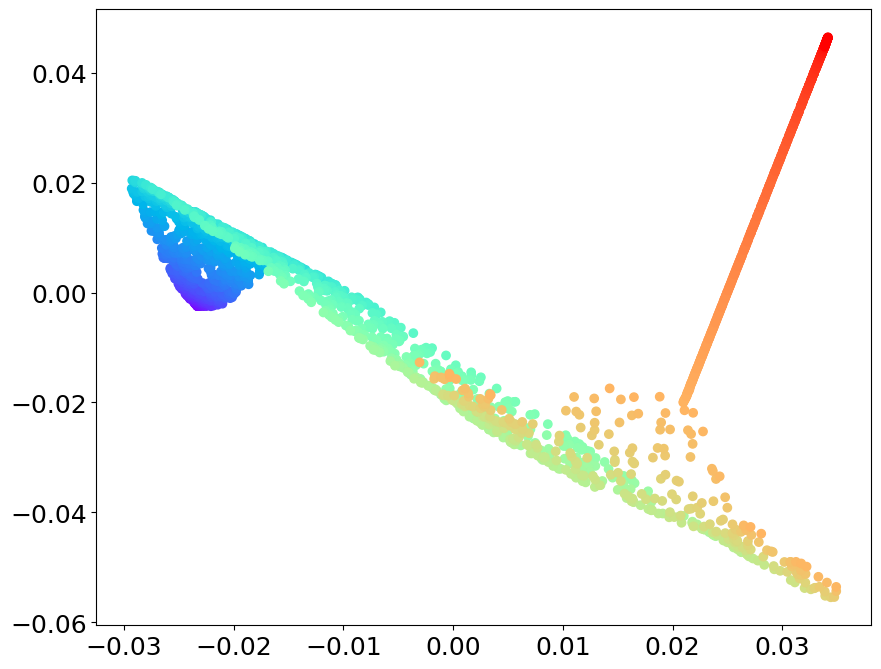

In [18]:
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(y[:,0], y[:,1], c=t, cmap = plt.cm.rainbow)

# MDS: Multidimensional Scaling

In [15]:
mds = MDS(n_components=2, n_jobs = -1)
y2 = mds.fit_transform(x)

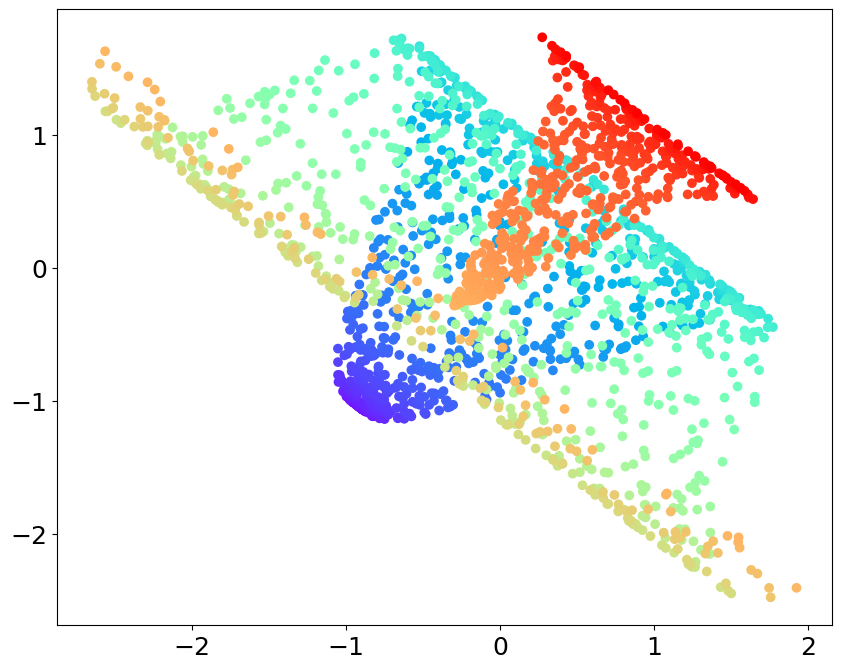

In [17]:
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(y2[:,0], y2[:,1], c=t, cmap = plt.cm.rainbow)

## ISO map

In [24]:
iso = Isomap(n_neighbors=40, n_components=2, eigen_solver='dense', n_jobs=-1)
iso.fit(x)

Isomap(eigen_solver='dense', n_jobs=-1, n_neighbors=40)

In [25]:
y3 = iso.transform(x)

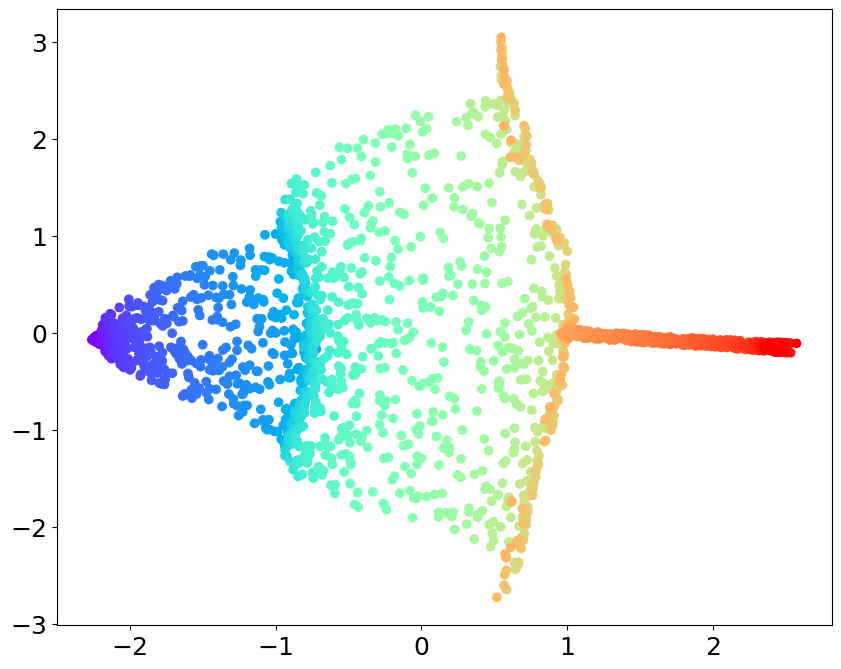

In [26]:
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(y3[:,0], y3[:,1], c=t, cmap = plt.cm.rainbow)

# t-SNE: t-distributed Stochastic Neighbour Embedding

In [19]:
tsne = TSNE(n_components=2, perplexity=5)
y4 = tsne.fit_transform(x)

C:\Users\azizt\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\azizt\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


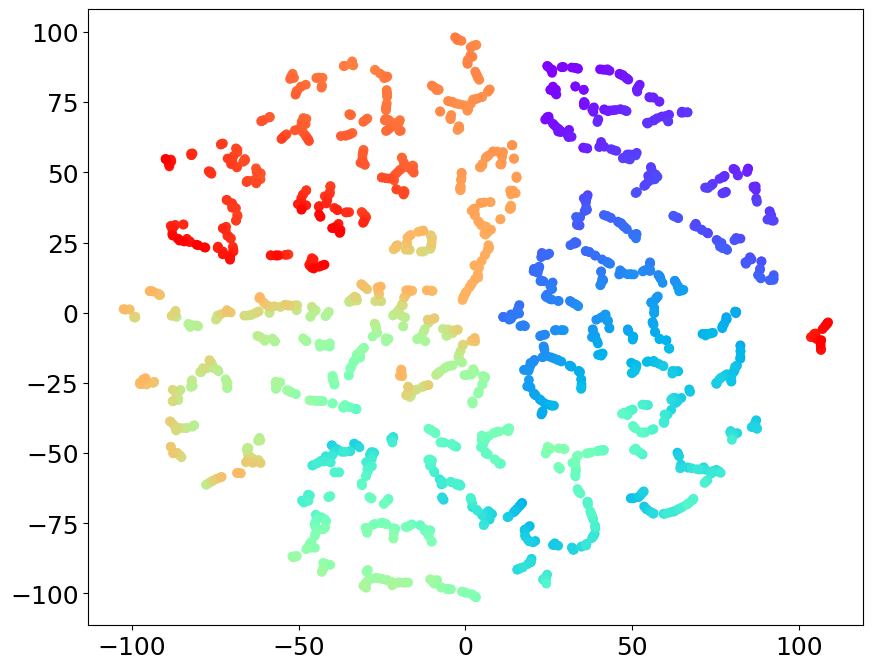

In [20]:
fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(y4[:,0], y4[:,1], c=t, cmap = plt.cm.rainbow)

C:\Users\azizt\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\azizt\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


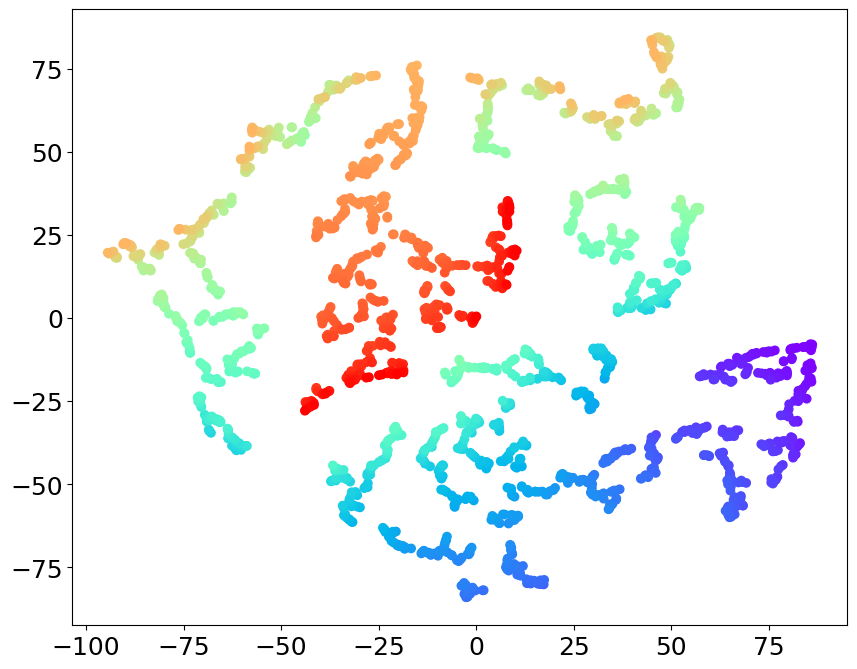

In [21]:
tsne = TSNE(n_components=2, perplexity=10)
y4 = tsne.fit_transform(x)

fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(y4[:,0], y4[:,1], c=t, cmap = plt.cm.rainbow)

C:\Users\azizt\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\azizt\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


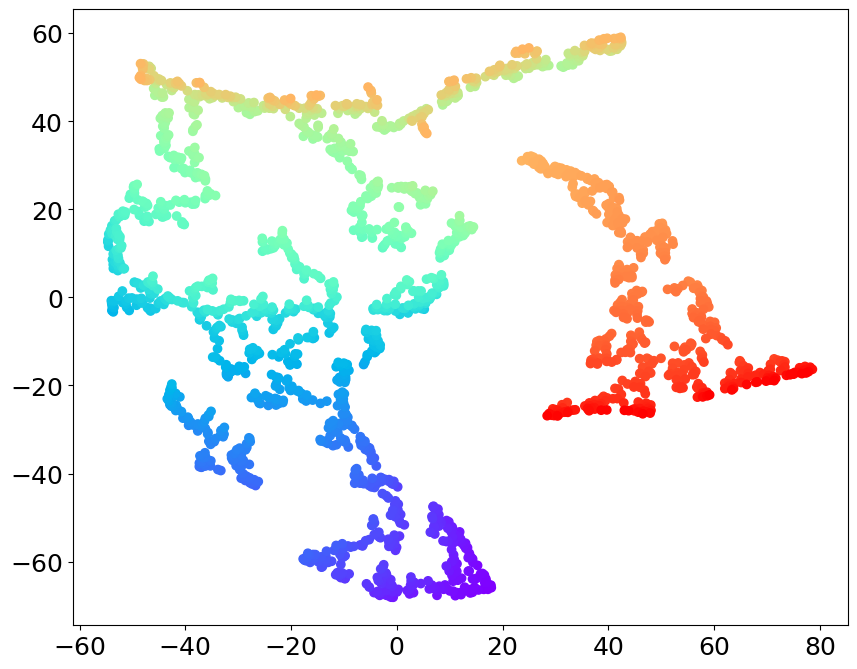

In [22]:
tsne = TSNE(n_components=2, perplexity=20)
y4 = tsne.fit_transform(x)

fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(y4[:,0], y4[:,1], c=t, cmap = plt.cm.rainbow)

C:\Users\azizt\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\azizt\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


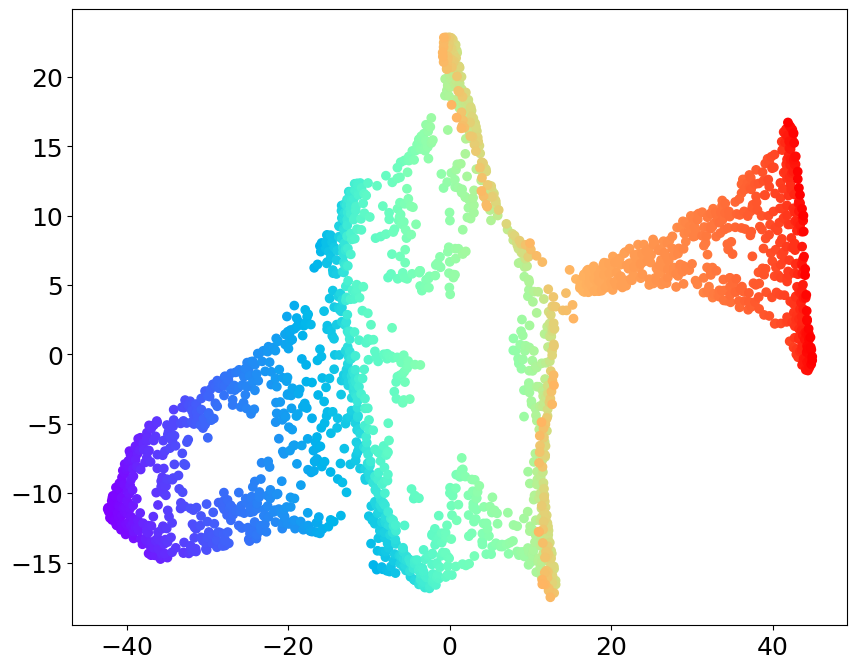

In [28]:
tsne = TSNE(n_components=2, perplexity=80)
y4 = tsne.fit_transform(x)

fig = plt.figure(figsize=FIGURESIZE)
ax = fig.add_subplot(111)
ax.scatter(y4[:,0], y4[:,1], c=t, cmap = plt.cm.rainbow)